## Import Datasets and Libraries

In [9]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [10]:
score_method = "st"
dataset = "full"
alias = "30%"
var_method = "proxy"
corr_method = "cosine"
rating = "fine-grained"

cfg = {
"fig_input_path": f"../../results/{score_method}_{dataset}_{var_method}_{corr_method}_{rating}.jsonl",
"title": f"{dataset} /{score_method} / {var_method} / {corr_method} / {rating}",
"min_cosine_similarity": 0,
"max_cosine_similarity": 0.9,
"fig_output_path": f"../results/{score_method}_{var_method}_{corr_method}.png"
}


def load_processed_data(open_json):
    with open(open_json, 'r') as file:
        data = [json.loads(line) for line in file.readlines()]
    return data

print(cfg["fig_input_path"])
data = load_processed_data(cfg["fig_input_path"])

../../results/st_full_proxy_cosine_fine-grained.jsonl


In [11]:
scores = []
gpt_scores = []

def sigmoid(x): return 1 / (1 + np.exp(-x))
                            
scores = [ item['scores'] for item in data]
scores_avg = [(np.mean(prob)) for prob in scores]
#scores_avg = [(gpt_scores[i]/np.mean(scores[i])) for i in range(len(data))]
score_variance = [item['score_variance'] for item in data]
correlation = [item['correlation'] for item in data]
instruction = [item['instruction'] for item in data]
gpt_inference = [item['gpt_inference'] for item in data]
annotations = []




response = []
for item in data:
    response_str = ""
    for i in range(len(item['completions'])):
        response_str += item['completions'][i]['response']
        if i != 3:
            response_str += ", "
    response.append(response_str)


combined_df = pd.DataFrame({
    'score_avg': scores_avg,
    'scores': scores,
    'score_variance': score_variance,
    'correlation': correlation,
    'instruction': instruction,
    'response': response,
    'gpt_inference': gpt_inference,

})



## Draw Basic Scatter Plots

/tmp/ipykernel_192570/3483816581.py:3: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  scatter = plt.scatter(combined_df['score_variance'], combined_df['score_avg'], c=combined_df['correlation'], cmap='viridis', alpha=1)
/tmp/ipykernel_192570/3483816581.py:7: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.colorbar(scatter, label='preference correlation')


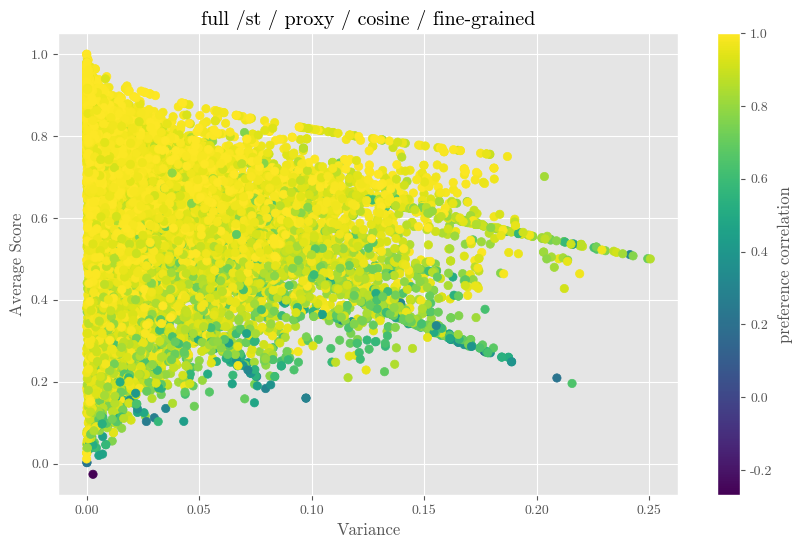

In [12]:
# Scatter plot with variance on the x-axis and score_avg on the y-axis, colored by score_avg
plt.figure(figsize=(10, 6))
scatter = plt.scatter(combined_df['score_variance'], combined_df['score_avg'], c=combined_df['correlation'], cmap='viridis', alpha=1)
plt.xlabel('Variance')
plt.ylabel('Average Score')
plt.title(cfg['title'])
plt.colorbar(scatter, label='preference correlation')
plt.grid(True)
plt.show()

/tmp/ipykernel_192570/1146637928.py:3: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  scatter = plt.scatter(
/tmp/ipykernel_192570/1146637928.py:18: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  cbar = plt.colorbar(scatter)


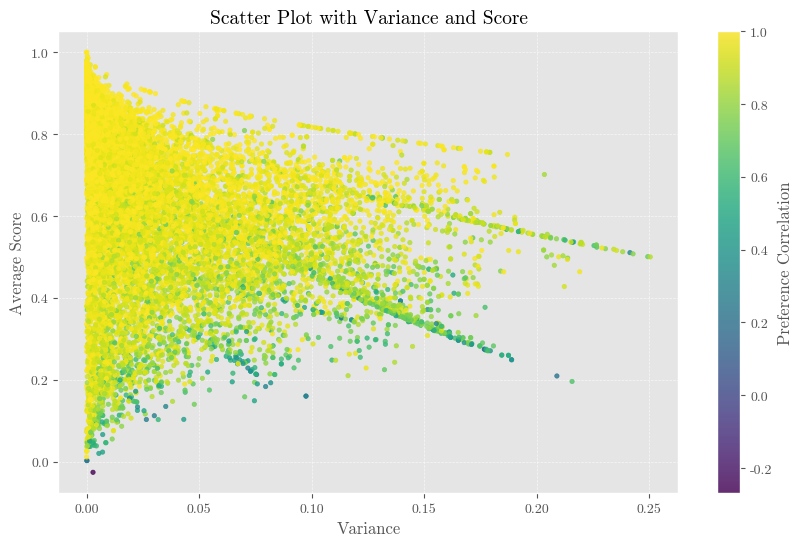

In [13]:
# 그래프 그리기
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    combined_df['score_variance'], 
    combined_df['score_avg'], 
    c=combined_df['correlation'], 
    cmap='viridis', 
    s=10,  # 점 크기 조정 (기본보다 작게)
    alpha=0.8  # 적절한 투명도 적용
)

# 레이블 및 제목 설정
plt.xlabel('Variance', fontsize=12, fontweight='bold')
plt.ylabel('Average Score', fontsize=12, fontweight='bold')
plt.title('Scatter Plot with Variance and Score', fontsize=14, fontweight='bold')

# 컬러바 추가
cbar = plt.colorbar(scatter)
cbar.set_label('Preference Correlation', fontsize=12)

# 그리드 설정 (점선 스타일 적용)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# 그래프 출력
plt.show()

/tmp/ipykernel_192570/2496843394.py:19: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax = plt.gca()
/tmp/ipykernel_192570/2496843394.py:34: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  cbar = plt.colorbar(scatter)


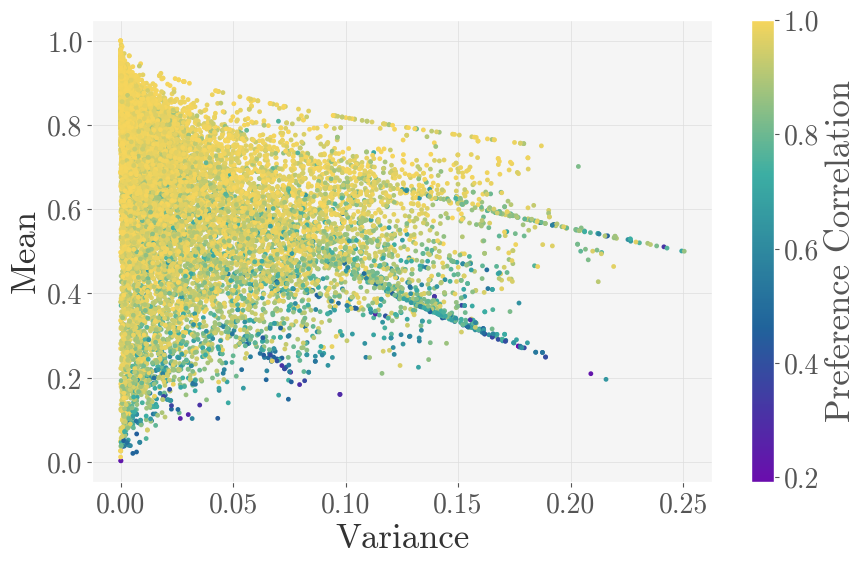

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# 🔹 1. 커스텀 컬러맵 정의 (보라 → 파랑 → 초록 → 노랑)
custom_cmap = LinearSegmentedColormap.from_list(
    "custom_palette", ["#6a0dad", "#20639B", "#3CAEA3", "#F6D55C"], N=256
)

# 🔹 2. 스타일 적용
plt.style.use("ggplot")
plt.rcParams['font.family'] = 'cmr10'
plt.rcParams["axes.unicode_minus"] = False
# 🔹 3. 그래프 그리기
light_gray = "#f5f5f5"  # 아주 연한 회색 (Hex 코드 사용 가능)

plt.figure(figsize=(10, 6))  # 전체 배경색 설정
ax = plt.gca()
ax.set_facecolor(light_gray)  # 그래프 내부 배경색 설정

combined_df = combined_df[combined_df['score_avg'] > 0]  # 0.5 이상만 필터링
scatter = plt.scatter(
    combined_df['score_variance'], 
    combined_df['score_avg'], 
    c=combined_df['correlation'], 
    cmap=custom_cmap,  # 커스텀 컬러맵 적용
    s=12,  # 점 크기 줄이기
    edgecolors='none',  # 테두리 제거
    alpha=1,  # 적절한 투명도 적용
)

# 🔹 4. 컬러바 추가 (디자인 개선)
cbar = plt.colorbar(scatter)
cbar.formatter.set_powerlimits((0, 0))  # 지수 표기 방지
cbar.ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.2f}"))  # 소수점 2자리
cbar.update_ticks()  # 변경 사항 적용
cbar.set_label('Preference Correlation', fontsize=25, fontweight='bold')
cbar.ax.tick_params(labelsize=20)  # 컬러바 숫자 크기 증가

# 🔹 5. 축 및 제목 스타일 조정
plt.xlabel('Variance', fontsize=25, fontweight='bold', color='#333333')
plt.ylabel('Mean', fontsize=25, fontweight='bold', color='#333333')
plt.title('', fontsize=16, fontweight='bold', color='#222222')

# 🔹 6. 그리드 및 디자인 마무리
plt.grid(True, linestyle='-', linewidth=0.5, alpha=1, color='#dddddd')
plt.tick_params(axis='both', labelsize=20)  # X, Y축 숫자 크기 증가

# 그래프 출력
plt.savefig("scatter_plot.png", dpi=300, bbox_inches='tight', facecolor='w')
plt.savefig("scatter_plot.pdf", dpi=300, bbox_inches='tight', facecolor='w')
plt.show()


In [ ]:
# 히스토그램 그리기
bin_edges = np.arange(0, 1.025, 0.025)  # -1부터 1까지 0.1 간격
plt.figure(figsize=(8, 5))
plt.hist(combined_df['correlation'], bins=bin_edges, color='teal', edgecolor='black', alpha=0.7)
plt.title('Correlation Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Correlation', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


NameError: name 'filtered_df' is not defined

<Figure size 800x500 with 0 Axes>

In [20]:
bin_edges = np.arange(0, 1.1, 0.1)  # -1부터 1까지 0.1 간격
# Count samples in each bin
bin_counts = pd.cut(combined_df['correlation'], bins=bin_edges).value_counts()
# Display the counts
print(bin_counts)

correlation
(0.9, 1.0]    16724
(0.8, 0.9]     1791
(0.7, 0.8]      582
(0.6, 0.7]      277
(0.5, 0.6]      116
(0.4, 0.5]       49
(0.3, 0.4]       27
(0.2, 0.3]       10
(0.1, 0.2]        2
(0.0, 0.1]        0
Name: count, dtype: int64


/tmp/ipykernel_36452/476412642.py:3: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.hist(filtered_df['correlation'], bins=30, color='teal', alpha=0.7)


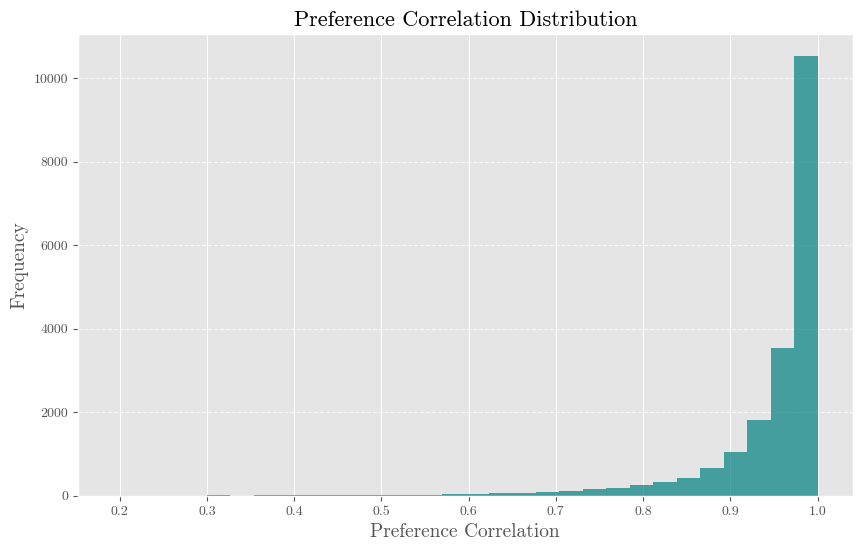

In [ ]:
# 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['correlation'], bins=30, color='teal', edgecolor='black', alpha=0.7)
plt.title('Preference Correlation Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Preference Correlation', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/tmp/ipykernel_36452/3293290372.py:19: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax = plt.gca()


PermissionError: [Errno 13] Permission denied: 'scatter_plot_dot.png'

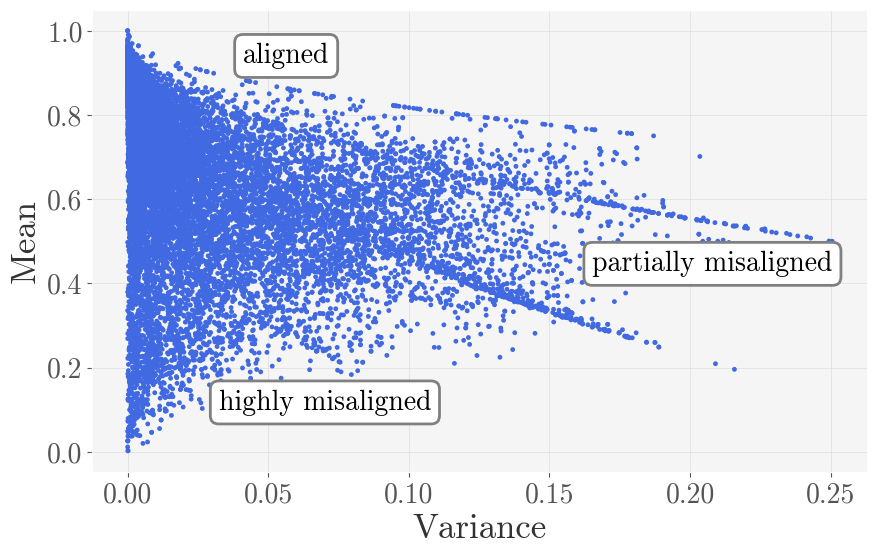

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# 🔹 1. 커스텀 컬러맵 정의 (보라 → 파랑 → 초록 → 노랑)
custom_cmap = LinearSegmentedColormap.from_list(
    "custom_palette", ["#6a0dad", "#20639B", "#3CAEA3", "#F6D55C"], N=256
)

# 🔹 2. 스타일 적용
plt.style.use("ggplot")
plt.rcParams['font.family'] = 'cmr10'
plt.rcParams["axes.unicode_minus"] = False
# 🔹 3. 그래프 그리기
light_gray = "#f5f5f5"  # 아주 연한 회색 (Hex 코드 사용 가능)

plt.figure(figsize=(10, 6))  # 전체 배경색 설정
ax = plt.gca()
ax.set_facecolor(light_gray)  # 그래프 내부 배경색 설정

combined_df = combined_df[combined_df['score_avg'] > 0]  # 0.5 이상만 필터링
scatter = plt.scatter(
    combined_df['score_variance'], 
    combined_df['score_avg'], 
    c='royalblue',
    s=12,  # 점 크기 줄이기
    edgecolors='none',  # 테두리 제거
    alpha=1,  # 적절한 투명도 적용
)

# 🔹 5. 축 및 제목 스타일 조정
plt.xlabel('Variance', fontsize=25, fontweight='bold', color='#333333')
plt.ylabel('Mean', fontsize=25, fontweight='bold', color='#333333')
plt.title('', fontsize=16, fontweight='bold', color='#222222')

# 🔹 6. 그리드 및 디자인 마무리
plt.grid(True, linestyle='-', linewidth=0.5, alpha=1, color='#dddddd')
plt.tick_params(axis='both', labelsize=20)  # X, Y축 숫자 크기 증가

#Annotate Regions.
bb = lambda c: dict(boxstyle="round,pad=0.3", ec=c, lw=2, fc="white")
an1 = plt.annotate("partially misaligned", xy=(0.8, 0.45), xycoords="axes fraction", fontsize=20, color='black',
             va="center", ha="center", bbox=bb('grey'))
an2 = plt.annotate("aligned", xy=(0.25, 0.90), xycoords="axes fraction", fontsize=20, color='black',
             va="center", ha="center", bbox=bb('grey'))
an3 = plt.annotate("highly misaligned", xy=(0.30, 0.15), xycoords="axes fraction", fontsize=20, color='black',
             va="center", ha="center", bbox=bb('grey'))

# 그래프 출력
plt.savefig("scatter_plot_dot.png", dpi=300, bbox_inches='tight', facecolor='w')
plt.savefig("scatter_plot_dot.pdf", dpi=300, bbox_inches='tight', facecolor='w')
plt.show()

/tmp/ipykernel_36452/1072128092.py:19: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax = plt.gca()


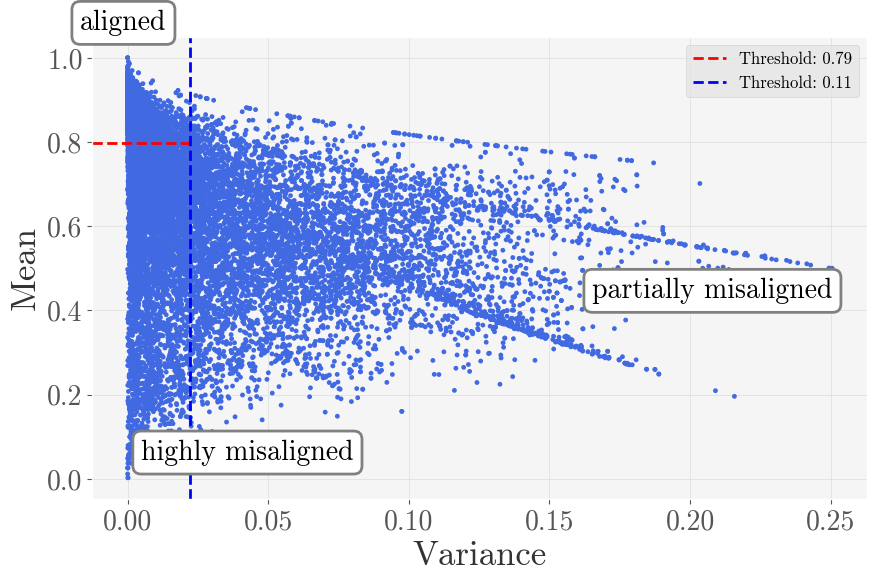

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# 🔹 1. 커스텀 컬러맵 정의 (보라 → 파랑 → 초록 → 노랑)
custom_cmap = LinearSegmentedColormap.from_list(
    "custom_palette", ["#6a0dad", "#20639B", "#3CAEA3", "#F6D55C"], N=256
)

# 🔹 2. 스타일 적용
plt.style.use("ggplot")
plt.rcParams['font.family'] = 'cmr10'
plt.rcParams["axes.unicode_minus"] = False
# 🔹 3. 그래프 그리기
light_gray = "#f5f5f5"  # 아주 연한 회색 (Hex 코드 사용 가능)

plt.figure(figsize=(10, 6))  # 전체 배경색 설정
ax = plt.gca()
ax.set_facecolor(light_gray)  # 그래프 내부 배경색 설정

combined_df = combined_df[combined_df['score_avg'] > 0]  # 0.5 이상만 필터링
scatter = plt.scatter(
    combined_df['score_variance'], 
    combined_df['score_avg'], 
    c='royalblue',
    s=12,  # 점 크기 줄이기
    edgecolors='none',  # 테두리 제거
    alpha=1,  # 적절한 투명도 적용
)

x_min, x_max = ax.get_xlim()
x_ratio = (0.022096035477578546 - x_min) / (x_max - x_min)
# 빨간 수평선 그리기: 좌측 plot 경계(=0.0) ~ x=0.022까지
ax.axhline(
    y=0.7985300570726395,
    xmin=0, xmax=x_ratio,  # 비율 기준!
    color='red', linestyle='--', linewidth=2, label='Threshold: 0.79'
)
plt.legend(fontsize=12)
# Add a vertical line at x=0.11174945458019603
plt.axvline(x=0.022096035477578546, color='blue', linestyle='--', linewidth=2, label='Threshold: 0.11')
plt.legend(fontsize=12)

# 🔹 5. 축 및 제목 스타일 조정
plt.xlabel('Variance', fontsize=25, fontweight='bold', color='#333333')
plt.ylabel('Mean', fontsize=25, fontweight='bold', color='#333333')
plt.title('', fontsize=16, fontweight='bold', color='#222222')

# 🔹 6. 그리드 및 디자인 마무리
plt.grid(True, linestyle='-', linewidth=0.5, alpha=1, color='#dddddd')
plt.tick_params(axis='both', labelsize=20)  # X, Y축 숫자 크기 증가

#Annotate Regions.
bb = lambda c: dict(boxstyle="round,pad=0.3", ec=c, lw=2, fc="white")
an1 = plt.annotate("partially misaligned", xy=(0.8, 0.45), xycoords="axes fraction", fontsize=20, color='black',
             va="center", ha="center", bbox=bb('grey'))
an2 = plt.annotate("aligned", xy=(0.04, 1.03), xycoords="axes fraction", fontsize=20, color='black',
             va="center", ha="center", bbox=bb('grey'))
an3 = plt.annotate("highly misaligned", xy=(0.20, 0.1), xycoords="axes fraction", fontsize=20, color='black',
             va="center", ha="center", bbox=bb('grey'))

# 그래프 출력
plt.savefig("scatter_plot_line.png", dpi=300, bbox_inches='tight', facecolor='w')
plt.savefig("scatter_plot_line.pdf", dpi=300, bbox_inches='tight', facecolor='w')
plt.show()

/tmp/ipykernel_36452/1395036317.py:20: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax = plt.gca()


PermissionError: [Errno 13] Permission denied: 'save_vl.pdf'

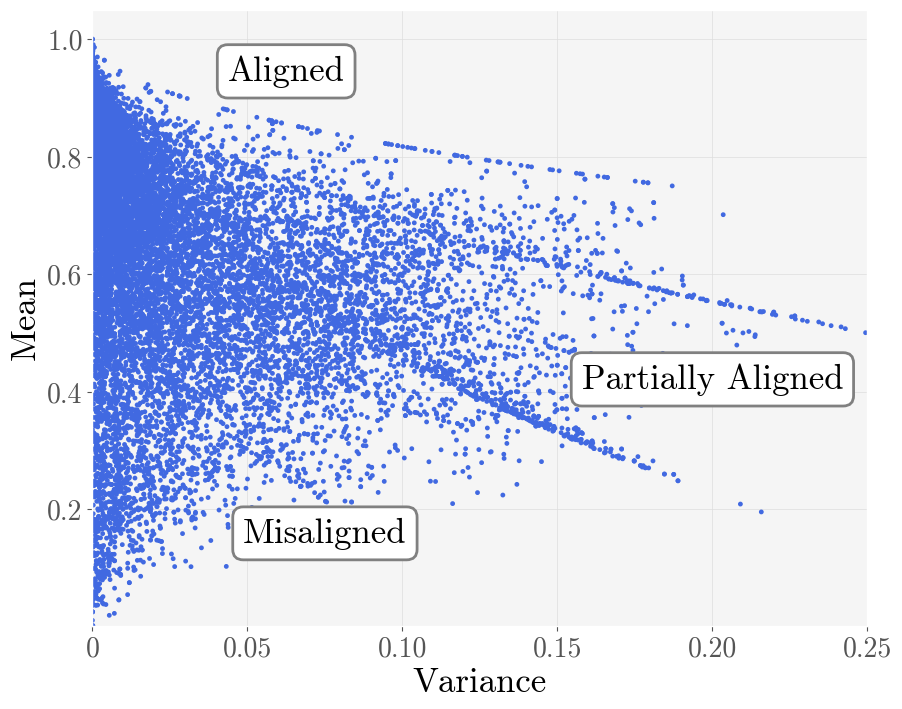

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# 🔹 1. 커스텀 컬러맵 정의 (보라 → 파랑 → 초록 → 노랑)
custom_cmap = LinearSegmentedColormap.from_list(
    "custom_palette", ["#6a0dad", "#20639B", "#3CAEA3", "#F6D55C"], N=256
)

# 🔹 2. 스타일 적용
plt.style.use("ggplot")
plt.rcParams['font.family'] = 'cmr10'
plt.rcParams["axes.unicode_minus"] = False

# 🔹 3. 그래프 그리기
light_gray = "#f5f5f5"  # 아주 연한 회색 (Hex 코드 사용 가능)

plt.figure(figsize=(10, 8)) 
ax = plt.gca()
ax.set_facecolor(light_gray)  # 그래프 내부 배경색 설정

combined_df = combined_df[combined_df['score_avg'] > 0]  # 0보다 큰 값만 필터링

scatter = plt.scatter(
    combined_df['score_variance'], 
    combined_df['score_avg'], 
    c='royalblue',
    s=12,  # 점 크기 줄이기
    edgecolors='none',  # 테두리 제거
    alpha=1,  # 적절한 투명도 적용
)

# 🔹 5. 축 및 제목 스타일 조정
plt.xlabel('Variance', fontsize=25, fontweight='bold', color='black')
plt.ylabel('Mean', fontsize=25, fontweight='bold', color='black')

plt.title('', fontsize=16, fontweight='bold', color='black')

plt.xlim(0, 0.25)  # x축을 0~0.25로 고정
plt.ylim(combined_df['score_avg'].min() * 0.9, 1.05)  

x_ticks = np.linspace(0, 0.25, 6)  
y_ticks = np.linspace(combined_df['score_avg'].min() * 0.9, 1.05, 6)
plt.xticks(x_ticks, [f'{int(tick)}' if tick.is_integer() else f'{tick:.2f}' for tick in x_ticks])

plt.grid(True, linestyle='-', linewidth=0.5, alpha=1, color='#dddddd')
plt.tick_params(axis='both', labelsize=20)  # X, Y축 숫자 크기 증가

# Annotate Regions.
bb = lambda c: dict(boxstyle="round,pad=0.3", ec=c, lw=2, fc="white")
an1 = plt.annotate("Partially Aligned", xy=(0.8, 0.40), xycoords="axes fraction", fontsize=25, color='black',
             va="center", ha="center", bbox=bb('grey'))
an2 = plt.annotate("Aligned", xy=(0.25, 0.90), xycoords="axes fraction", fontsize=25, color='black',
             va="center", ha="center", bbox=bb('grey'))
an3 = plt.annotate("Misaligned", xy=(0.30, 0.15), xycoords="axes fraction", fontsize=25, color='black',
             va="center", ha="center", bbox=bb('grey'))

# pdf 저장
plt.savefig(f"save_vl.pdf", dpi=300, bbox_inches='tight', facecolor='w')


# 그래프 출력
plt.savefig("scatter_plot_dot.png", dpi=300, bbox_inches='tight', facecolor='w')
plt.savefig("scatter_plot_dot.pdf", dpi=300, bbox_inches='tight', facecolor='w')
plt.show()



## Draw Bin plots

In [ ]:
filtered_df = combined_df[combined_df['correlation'] > 0]
filtered_df = filtered_df[filtered_df['correlation'] < 1]
min_correlation = filtered_df['correlation'].min()
print(f"The minimum cosine similarity in the filtered dataframe is: {min_correlation}")

The minimum cosine similarity in the filtered dataframe is: 0.19232756107365034


/tmp/ipykernel_36452/3084319908.py:28: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(8, 6))
/tmp/ipykernel_36452/3084319908.py:35: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<Figure size 800x600 with 0 Axes>

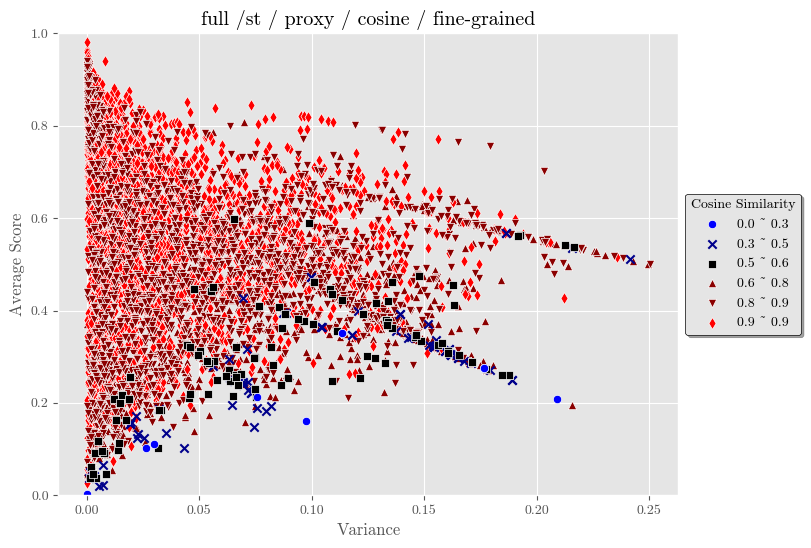

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define bins, colors, and shapes based on 'correlation'
cosine_bins = [0.0, 0.3, 0.5, 0.6, 0.8, 0.9, 0.95]

# Generate color gradient: blue → dark blue → black → dark red → red
cmap = ListedColormap(['blue', 'darkblue', 'black', 'darkred'])
gradient_colors = [cmap(i / 4) for i in range(5)]  # 5 gradient colors
gradient_colors.append('red')  # Add red for the last bin
colors = {i + 1: gradient_colors[i] for i in range(6)}
 
# Define shapes for each bin
shapes = {1: 'o', 2: 'x', 3: 's', 4: '^', 5: 'v', 6: 'd'}

# Classify 'correlation' into bins
filtered_df['cosine_bin'] = pd.cut(
    filtered_df['correlation'], 
    bins=cosine_bins,
    labels=[1, 2, 3, 4, 5, 6],  # Correspond to colors and shapes
    include_lowest=True
)

# Initialize plot
plt.figure(figsize=(8, 6))
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot with varying colors and shapes
for c in filtered_df['cosine_bin'].unique():
    if pd.isna(c):  # Skip NaN bins
        continue
    subset_df = filtered_df[filtered_df['cosine_bin'] == c]
    ax.scatter(
        subset_df['score_variance'], 
        subset_df['score_avg'], 
        c=[colors[int(c)]],  # Match the color to the cosine bin
        marker=shapes[int(c)],  # Match the shape to the cosine bin
        edgecolors='white',  # Add black border to points
        label=f'{cosine_bins[int(c)-1]:.1f} ~ {cosine_bins[int(c)]:.1f}', 
        alpha=1.0
    )

# Sort the legend manually by the cosine_bin order
handles, labels = ax.get_legend_handles_labels()  # Get current legend handles and labels

# Sort handles and labels by the numeric range in labels
sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: float(x[1].strip().split("~")[0]))
sorted_handles, sorted_labels = zip(*sorted_handles_labels)

# LaTeX 스타일 텍스트 활성화
plt.rcParams['font.family'] = 'cmr10'

# Axis labels and legend
plt.xlabel('Variance')
plt.ylabel('Average Score')
plt.title(cfg['title'])
ax.set_ylim(0.0, 1.0)  # Set y-axis limits to [0, 1]
ax.legend(
    sorted_handles,
    sorted_labels,
    title="Cosine Similarity", 
    loc="center left",       # 범례를 왼쪽 중앙에 앵커링
    bbox_to_anchor=(1.0, 0.5),  # 그래프의 오른쪽에 위치하도록 설정
    frameon=True,            # 박스 활성화
    edgecolor='black',       # 테두리 색상
    framealpha=1.0,           # 테두리 투명도
    shadow=True
)

plt.grid(True)

# Add colorbar for full cosine similarity range
scatter = ax.scatter(
    filtered_df['score_variance'], 
    filtered_df['score_avg'], 
    c=filtered_df['correlation'], 
    cmap='viridis', 
    alpha=0
)

plt.show()


## Draw Filtered Plots

In [ ]:
# filtered_df = combined_df[combined_df['correlation'] > 0]
# filtered_df = filtered_df[filtered_df['correlation'] < 0.6]
# print(f"The number of entries in the filtered dataframe is: {len(filtered_df)}")

# Calculate the threshold for the bottom 10% of score_avg
threshold = np.percentile(combined_df['correlation'], 1)

# Filter the dataframe to get the bottom 10%
bottom_10_df = combined_df[combined_df['correlation'] <= threshold]
print(f"The threshold for the bottom 10% of score_avg is: {threshold}")
print(f"The number of entries in the bottom 10% dataframe is: {len(bottom_10_df)}")

The threshold for the bottom 10% of score_avg is: 0.5934268190658483
The number of entries in the bottom 10% dataframe is: 196


/tmp/ipykernel_3014240/4056767307.py:27: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(8, 6))
/tmp/ipykernel_3014240/4056767307.py:34: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<Figure size 800x600 with 0 Axes>

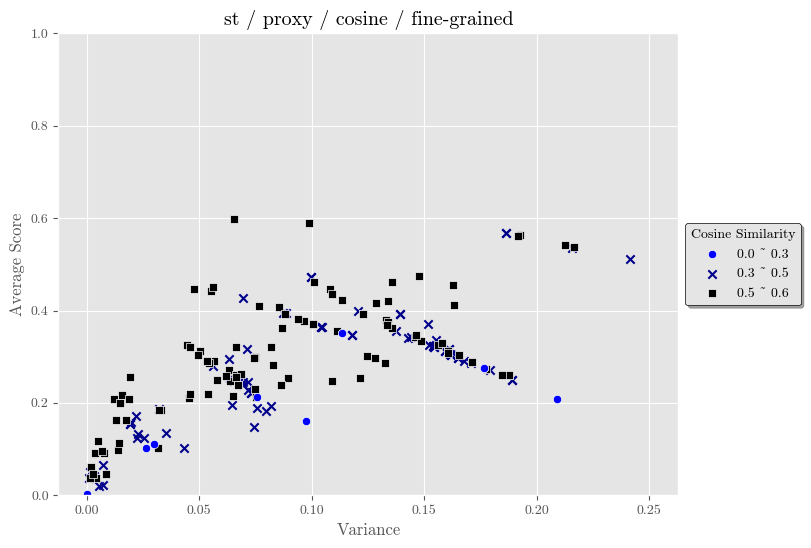

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define bins, colors, and shapes based on 'correlation'
cosine_bins = [0.0, 0.3, 0.5, 0.6]

# Generate color gradient: blue → dark blue → black → dark red → red
cmap = ListedColormap(['blue', 'darkblue', 'black'])
gradient_colors = [cmap(i / 2) for i in range(3)]  # 5 gradient colors
colors = {i + 1: gradient_colors[i] for i in range(3)}
 
# Define shapes for each bin
shapes = {1: 'o', 2: 'x', 3: 's'}

# Classify 'correlation' into bins
filtered_df['cosine_bin'] = pd.cut(
    filtered_df['correlation'], 
    bins=cosine_bins,
    labels=[1, 2, 3],  # Correspond to colors and shapes
    include_lowest=True
)

# Initialize plot
plt.figure(figsize=(8, 6))
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot with varying colors and shapes
for c in filtered_df['cosine_bin'].unique():
    if pd.isna(c):  # Skip NaN bins
        continue
    subset_df = filtered_df[filtered_df['cosine_bin'] == c]
    ax.scatter(
        subset_df['score_variance'], 
        subset_df['score_avg'], 
        c=[colors[int(c)]],  # Match the color to the cosine bin
        marker=shapes[int(c)],  # Match the shape to the cosine bin
        edgecolors='white',  # Add black border to points
        label=f'{cosine_bins[int(c)-1]:.1f} ~ {cosine_bins[int(c)]:.1f}', 
        alpha=1.0
    )

# Sort the legend manually by the cosine_bin order
handles, labels = ax.get_legend_handles_labels()  # Get current legend handles and labels

# Sort handles and labels by the numeric range in labels
sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: float(x[1].strip().split("~")[0]))
sorted_handles, sorted_labels = zip(*sorted_handles_labels)

# LaTeX 스타일 텍스트 활성화
plt.rcParams['font.family'] = 'cmr10'

# Axis labels and legend
plt.xlabel('Variance')
plt.ylabel('Average Score')
plt.title(cfg['title'])
ax.set_ylim(0.0, 1.0)  # Set y-axis limits to [0, 1]
ax.legend(
    sorted_handles,
    sorted_labels,
    title="Cosine Similarity", 
    loc="center left",       # 범례를 왼쪽 중앙에 앵커링
    bbox_to_anchor=(1.0, 0.5),  # 그래프의 오른쪽에 위치하도록 설정
    frameon=True,            # 박스 활성화
    edgecolor='black',       # 테두리 색상
    framealpha=1.0,           # 테두리 투명도
    shadow=True
)

plt.grid(True)
# Add colorbar for full cosine similarity range
scatter = ax.scatter(
    filtered_df['score_variance'], 
    filtered_df['score_avg'], 
    c=filtered_df['correlation'], 
    cmap='viridis', 
    alpha=0
)

plt.show()

## Dataset Cartography Style Plots

In [ ]:
filtered_df = combined_df[combined_df['correlation'] > 0.95]
filtered_df = filtered_df[filtered_df['correlation'] < 1]

/tmp/ipykernel_3014240/3133717181.py:23: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax0 = fig.add_subplot(gs[0, :])
/tmp/ipykernel_3014240/3133717181.py:61: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax1 = fig.add_subplot(gs[1, 0])
/tmp/ipykernel_3014240/3133717181.py:62: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax2 = fig.add_subplot(gs[1, 1])
/tmp/ipykernel_3014240/3133717181.py:63: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax3 = fig.add_subplot(gs[1, 2])


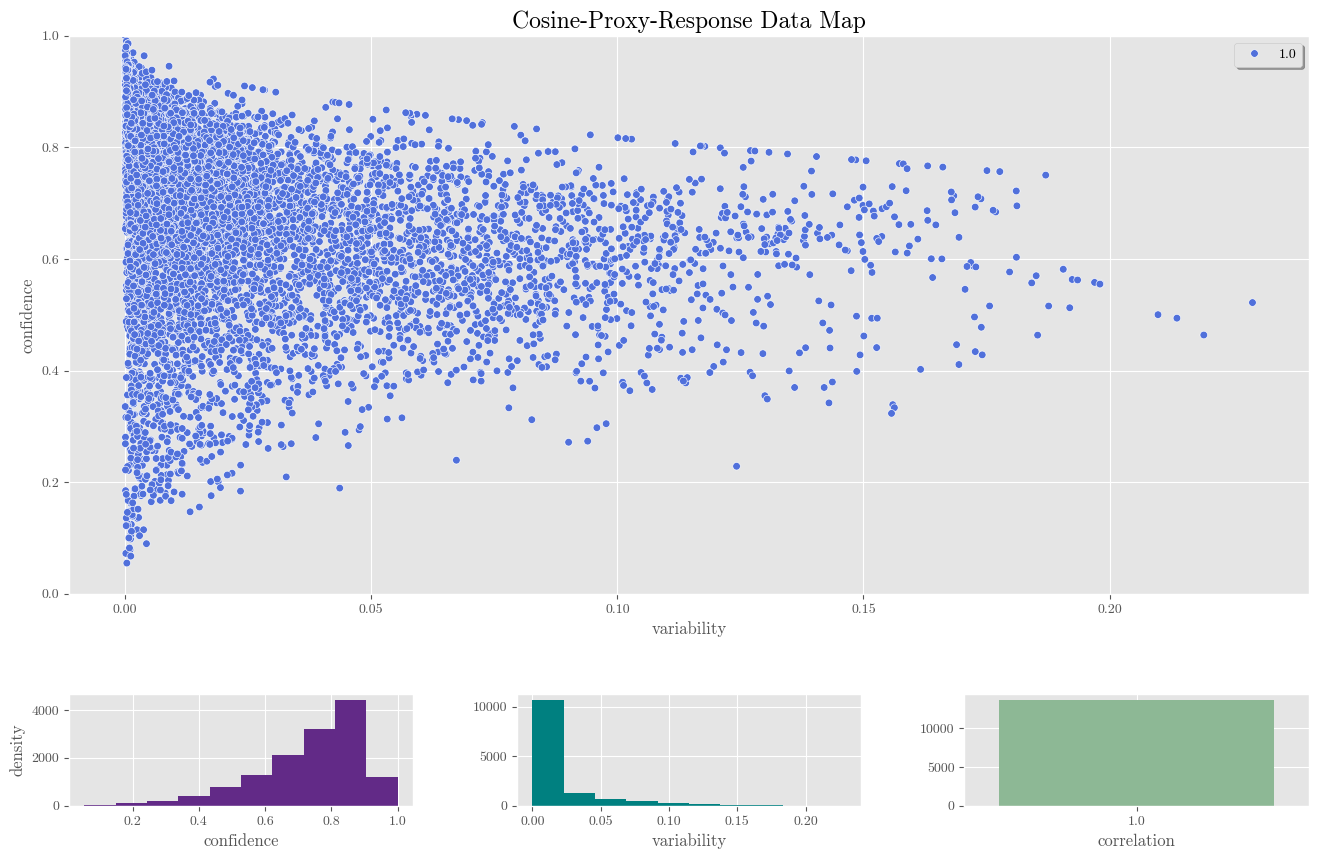

In [ ]:
def scatter_it(dataframe, hue_metric ='correct.', title='', model='Cosine', show_hist=False):
    # Subsample data to plot, so the plot is not too busy.
    dataframe = dataframe.sample(n=25000 if dataframe.shape[0] > 25000 else len(dataframe))
    
    # Normalize correctness to a value between 0 and 1.
    dataframe = dataframe.assign(corr_frac = lambda d: d.correlation / d.correlation.max())
    dataframe['correct.'] = [f"{x:.1f}" for x in dataframe['correlation']]
    
    main_metric = 'score_variance'
    other_metric = 'score_avg'
    
    hue = hue_metric
    num_hues = len(dataframe[hue].unique().tolist())
    style = hue_metric

    if not show_hist:
        fig, axs = plt.subplots(1, 1, figsize=(8, 4))
        ax0 = axs
        ax0.set_ylim(0.0, 1.0)  # Set y-axis limits to [0, 1]
    else:
        fig = plt.figure(figsize=(16, 10), )
        gs = fig.add_gridspec(2, 3, height_ratios=[5, 1])
        ax0 = fig.add_subplot(gs[0, :])
        ax0.set_ylim(0.0, 1.0)  # Set y-axis limits to [0, 1]
    
    
    ### Make the scatterplot.
    
    # Choose a palette.
    pal = sns.diverging_palette(260, 15, n=num_hues, sep=10, center="dark")

    plot = sns.scatterplot(x=main_metric,
                           y=other_metric,
                           ax=ax0,
                           data=dataframe,
                           hue=hue,
                           palette=pal,
                           style=style,
                           s=30)
    
    # Annotate Regions.
    # bb = lambda c: dict(boxstyle="round,pad=0.3", ec=c, lw=2, fc="white")
    # an1 = ax0.annotate("ambiguous", xy=(0.9, 0.5), xycoords="axes fraction", fontsize=15, color='black',
    #              va="center", ha="center", rotation=350, bbox=bb('black'))
    # an2 = ax0.annotate("easy-to-learn", xy=(0.27, 0.85), xycoords="axes fraction", fontsize=15, color='black',
    #              va="center", ha="center", bbox=bb('r'))
    # an3 = ax0.annotate("hard-to-learn", xy=(0.35, 0.25), xycoords="axes fraction", fontsize=15, color='black',
    #              va="center", ha="center", bbox=bb('b'))
    
    if not show_hist:
        plot.legend(ncol=1, bbox_to_anchor=(1.01, 0.5), loc='center left', fancybox=True, shadow=True)
    else:
        plot.legend(fancybox=True, shadow=True,  ncol=1)
    plot.set_xlabel('variability')
    plot.set_ylabel('confidence')
    
    if show_hist:
        plot.set_title(f"{model}-{title} Data Map", fontsize=17)
        
        # Make the histograms.
        ax1 = fig.add_subplot(gs[1, 0])
        ax2 = fig.add_subplot(gs[1, 1])
        ax3 = fig.add_subplot(gs[1, 2])

        plott0 = dataframe.hist(column=['score_avg'], ax=ax1, color='#622a87')
        plott0[0].set_title('')
        plott0[0].set_xlabel('confidence')
        plott0[0].set_ylabel('density')

        plott1 = dataframe.hist(column=['score_variance'], ax=ax2, color='teal')
        plott1[0].set_title('')
        plott1[0].set_xlabel('variability')

        #오름차순 정렬 plot2 
        sorted_order = sorted(dataframe['correct.'].unique(), key=lambda x: float(x))

        plot2 = sns.countplot(x="correct.", data=dataframe, color='#86bf91', ax=ax3, order=sorted_order)
        ax3.xaxis.grid(True)  # Show the vertical gridlines

        plot2.set_title('')
        plot2.set_xlabel('correlation')
        plot2.set_ylabel('')

    # fig.tight_layout()
    # filename = f'figures/{title}_{model}.pdf' if show_hist else f'figures/compact_{title}_{model}.pdf'
    # fig.savefig(filename, dpi=300)

scatter_it(filtered_df, title='Proxy-Response', show_hist=True)

In [ ]:
filtered_df = filtered_df[filtered_df['correlation'] < 0.95]

/tmp/ipykernel_3014240/3887222240.py:24: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax0 = fig.add_subplot(gs[0, 0])
/tmp/ipykernel_3014240/3887222240.py:34: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  plot = sns.scatterplot(x=main_metric,
/tmp/ipykernel_3014240/3887222240.py:55: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plot.legend(fancybox=True, shadow=True,  ncol=1)
/tmp/ipykernel_3014240/3887222240.py:64: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax1 = fig.add_subplot(right_gs[0, 0])
/tmp/ipykernel_3014240/3887222240.py:65: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax2 = fig.add_subplot(right_gs[1, 0])
/tmp/ipykernel_3014240/3887222240.py:

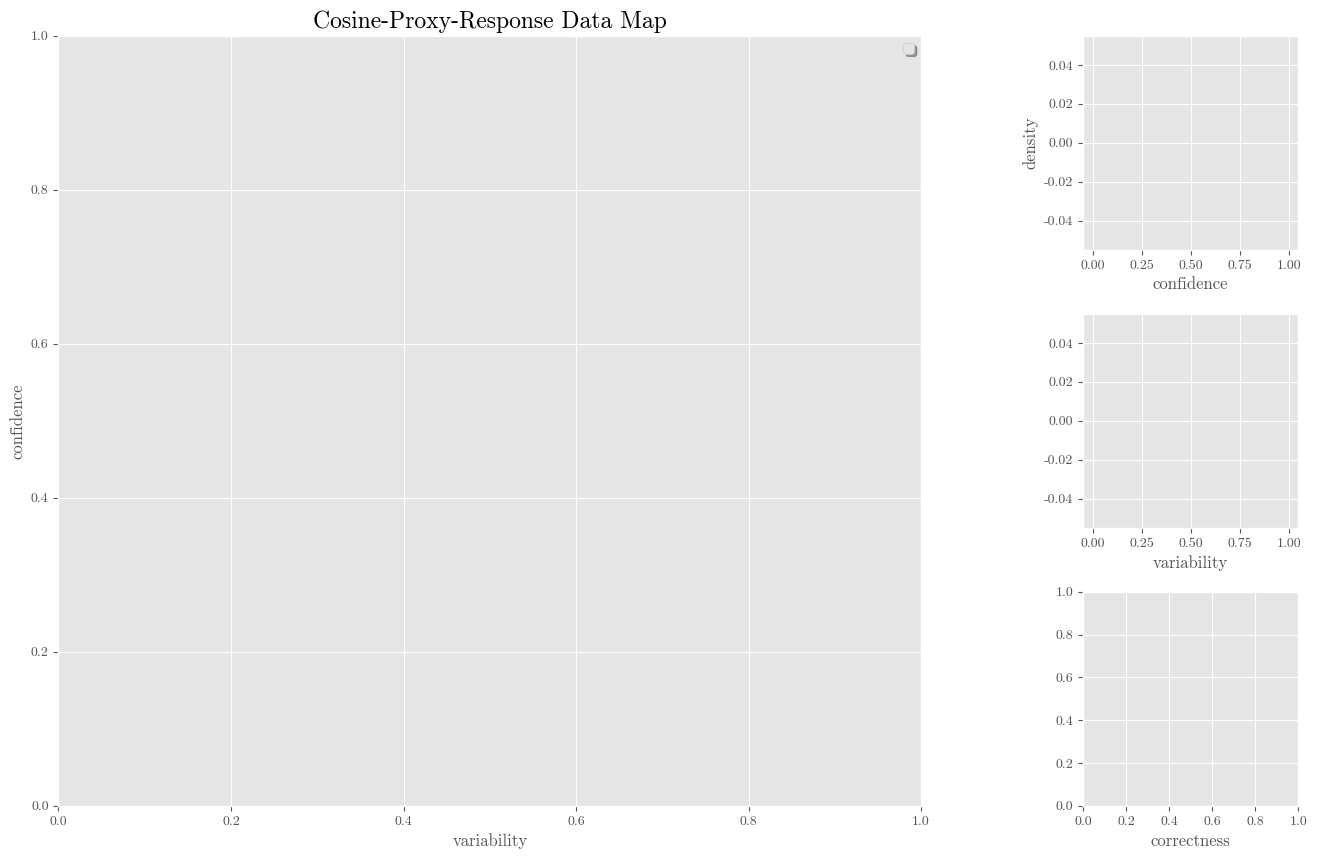

In [ ]:
def scatter_it(dataframe, hue_metric ='correct.', title='', model='Cosine', show_hist=False):
    # Subsample data to plot, so the plot is not too busy.
    dataframe = dataframe.sample(n=25000 if dataframe.shape[0] > 25000 else len(dataframe))
    
    # Normalize correctness to a value between 0 and 1.
    dataframe = dataframe.assign(corr_frac = lambda d: d.correlation / d.correlation.max())
    dataframe['correct.'] = [f"{x:.1f}" for x in dataframe['correlation']]
    
    main_metric = 'score_variance'
    other_metric = 'score_avg'
    
    hue = hue_metric
    num_hues = len(dataframe[hue].unique().tolist())
    style = hue_metric

    if not show_hist:
        fig, axs = plt.subplots(1, 1, figsize=(8, 4))
        ax0 = axs
        ax0.set_ylim(0.0, 1.0)  # Set y-axis limits to [0, 1]
        ax0.grid(True)
    else:
        fig = plt.figure(figsize=(16, 10), )
        gs = fig.add_gridspec(1, 2, width_ratios=[4, 1])  
        ax0 = fig.add_subplot(gs[0, 0]) 
        ax0.set_ylim(0.0, 1.0)  # Set y-axis limits to [0, 1]
        ax0.grid(True)
    
    
    ### Make the scatterplot.

    # Choose a palette.
    pal = sns.diverging_palette(260, 15, n=num_hues, sep=10, center="dark")

    plot = sns.scatterplot(x=main_metric,
                           y=other_metric,
                           ax=ax0,
                           data=dataframe,
                           hue=hue,
                           palette=pal,
                           style=style,
                           s=30)
    
    # Annotate Regions.
    # bb = lambda c: dict(boxstyle="round,pad=0.3", ec=c, lw=2, fc="white")
    # an1 = ax0.annotate("ambiguous", xy=(0.9, 0.5), xycoords="axes fraction", fontsize=15, color='black',
    #              va="center", ha="center", rotation=350, bbox=bb('black'))
    # an2 = ax0.annotate("easy-to-learn", xy=(0.27, 0.85), xycoords="axes fraction", fontsize=15, color='black',
    #              va="center", ha="center", bbox=bb('r'))
    # an3 = ax0.annotate("hard-to-learn", xy=(0.35, 0.25), xycoords="axes fraction", fontsize=15, color='black',
    #              va="center", ha="center", bbox=bb('b'))
    
    if not show_hist:
        plot.legend(ncol=1, bbox_to_anchor=(1.01, 0.5), loc='center left', fancybox=True, shadow=True)
    else:
        plot.legend(fancybox=True, shadow=True,  ncol=1)
    plot.set_xlabel('variability')
    plot.set_ylabel('confidence')
    
    if show_hist:
        plot.set_title(f"{model}-{title} Data Map", fontsize=17)
        
        # Make the histograms.
        right_gs = gs[0, 1].subgridspec(3, 1, height_ratios=[1, 1, 1])  
        ax1 = fig.add_subplot(right_gs[0, 0])
        ax2 = fig.add_subplot(right_gs[1, 0])  
        ax3 = fig.add_subplot(right_gs[2, 0]) 

        plott0 = dataframe.hist(column=['score_avg'], ax=ax1, color='#622a87')
        plott0[0].set_title('')
        plott0[0].set_xlabel('confidence')
        plott0[0].set_ylabel('density')

        plott1 = dataframe.hist(column=['score_variance'], ax=ax2, color='teal')
        plott1[0].set_title('')
        plott1[0].set_xlabel('variability')
        sorted_order = sorted(dataframe['correct.'].unique(), key=lambda x: float(x))


        plot2 = sns.countplot(x="correct.", data=dataframe, color='#86bf91', ax=ax3, order=sorted_order)
        ax3.xaxis.grid(True) # Show the vertical gridlines

        plot2.set_title('')
        plot2.set_xlabel('correctness')
        plot2.set_ylabel('')

    # fig.tight_layout()
    # filename = f'figures/{title}_{model}.pdf' if show_hist else f'figures/compact_{title}_{model}.pdf'
    # fig.savefig(filename, dpi=300)

scatter_it(filtered_df, title='Proxy-Response', show_hist=True)

In [ ]:
filtered_df = combined_df[combined_df['correlation'] < 0.95]

/tmp/ipykernel_3014240/3887222240.py:24: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax0 = fig.add_subplot(gs[0, 0])
/tmp/ipykernel_3014240/3887222240.py:64: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax1 = fig.add_subplot(right_gs[0, 0])
/tmp/ipykernel_3014240/3887222240.py:65: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax2 = fig.add_subplot(right_gs[1, 0])
/tmp/ipykernel_3014240/3887222240.py:66: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax3 = fig.add_subplot(right_gs[2, 0])


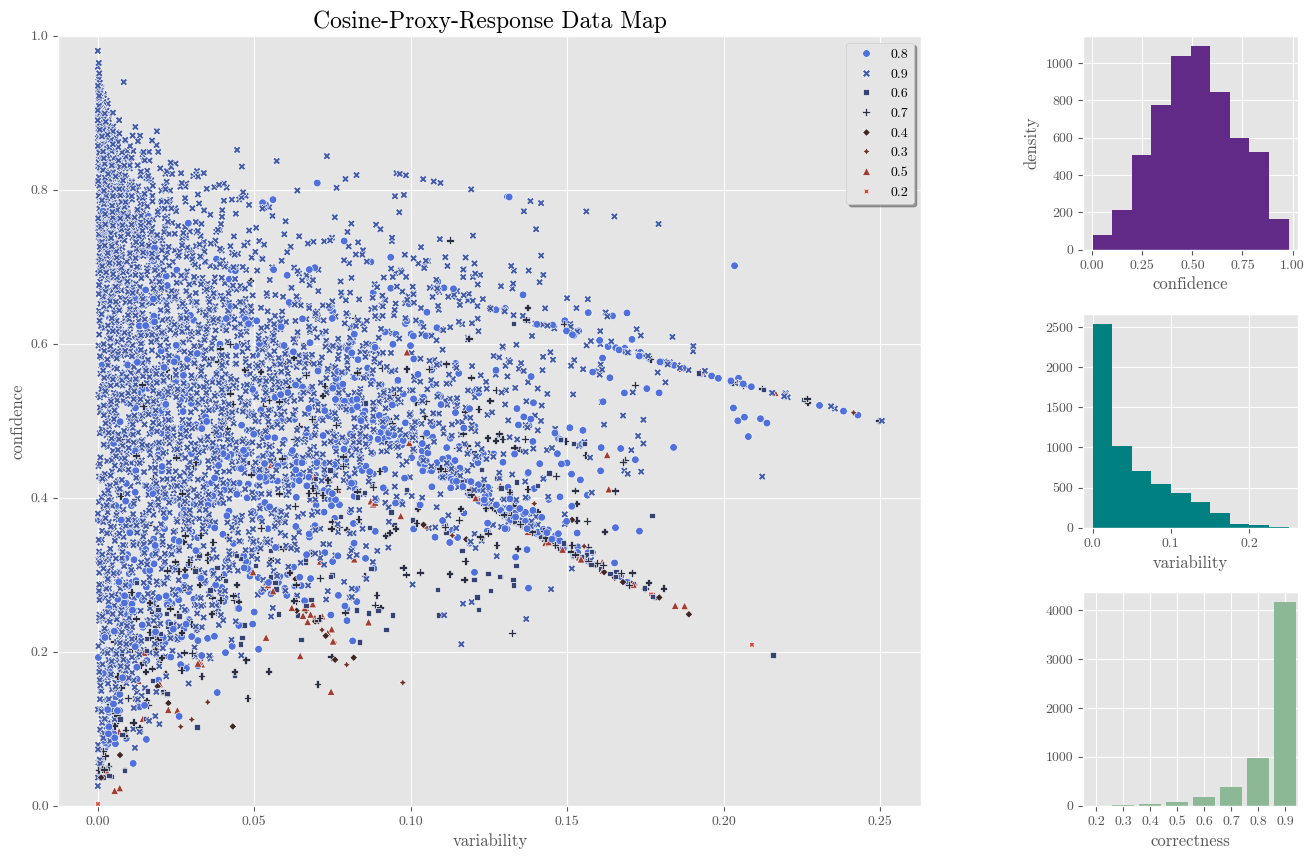

In [ ]:
def scatter_it(dataframe, hue_metric ='correct.', title='', model='Cosine', show_hist=False):
    # Subsample data to plot, so the plot is not too busy.
    dataframe = dataframe.sample(n=25000 if dataframe.shape[0] > 25000 else len(dataframe))
    
    # Normalize correctness to a value between 0 and 1.
    dataframe = dataframe.assign(corr_frac = lambda d: d.correlation / d.correlation.max())
    dataframe['correct.'] = [f"{x:.1f}" for x in dataframe['correlation']]
    
    main_metric = 'score_variance'
    other_metric = 'score_avg'
    
    hue = hue_metric
    num_hues = len(dataframe[hue].unique().tolist())
    style = hue_metric

    if not show_hist:
        fig, axs = plt.subplots(1, 1, figsize=(8, 4))
        ax0 = axs
        ax0.set_ylim(0.0, 1.0)  # Set y-axis limits to [0, 1]
        ax0.grid(True)
    else:
        fig = plt.figure(figsize=(16, 10), )
        gs = fig.add_gridspec(1, 2, width_ratios=[4, 1])  
        ax0 = fig.add_subplot(gs[0, 0]) 
        ax0.set_ylim(0.0, 1.0)  # Set y-axis limits to [0, 1]
        ax0.grid(True)
    
    
    ### Make the scatterplot.

    # Choose a palette.
    pal = sns.diverging_palette(260, 15, n=num_hues, sep=10, center="dark")

    plot = sns.scatterplot(x=main_metric,
                           y=other_metric,
                           ax=ax0,
                           data=dataframe,
                           hue=hue,
                           palette=pal,
                           style=style,
                           s=30)
    
    # Annotate Regions.
    # bb = lambda c: dict(boxstyle="round,pad=0.3", ec=c, lw=2, fc="white")
    # an1 = ax0.annotate("ambiguous", xy=(0.9, 0.5), xycoords="axes fraction", fontsize=15, color='black',
    #              va="center", ha="center", rotation=350, bbox=bb('black'))
    # an2 = ax0.annotate("easy-to-learn", xy=(0.27, 0.85), xycoords="axes fraction", fontsize=15, color='black',
    #              va="center", ha="center", bbox=bb('r'))
    # an3 = ax0.annotate("hard-to-learn", xy=(0.35, 0.25), xycoords="axes fraction", fontsize=15, color='black',
    #              va="center", ha="center", bbox=bb('b'))
    
    if not show_hist:
        plot.legend(ncol=1, bbox_to_anchor=(1.01, 0.5), loc='center left', fancybox=True, shadow=True)
    else:
        plot.legend(fancybox=True, shadow=True,  ncol=1)
    plot.set_xlabel('variability')
    plot.set_ylabel('confidence')
    
    if show_hist:
        plot.set_title(f"{model}-{title} Data Map", fontsize=17)
        
        # Make the histograms.
        right_gs = gs[0, 1].subgridspec(3, 1, height_ratios=[1, 1, 1])  
        ax1 = fig.add_subplot(right_gs[0, 0])
        ax2 = fig.add_subplot(right_gs[1, 0])  
        ax3 = fig.add_subplot(right_gs[2, 0]) 

        plott0 = dataframe.hist(column=['score_avg'], ax=ax1, color='#622a87')
        plott0[0].set_title('')
        plott0[0].set_xlabel('confidence')
        plott0[0].set_ylabel('density')

        plott1 = dataframe.hist(column=['score_variance'], ax=ax2, color='teal')
        plott1[0].set_title('')
        plott1[0].set_xlabel('variability')
        sorted_order = sorted(dataframe['correct.'].unique(), key=lambda x: float(x))


        plot2 = sns.countplot(x="correct.", data=dataframe, color='#86bf91', ax=ax3, order=sorted_order)
        ax3.xaxis.grid(True) # Show the vertical gridlines

        plot2.set_title('')
        plot2.set_xlabel('correctness')
        plot2.set_ylabel('')

    # fig.tight_layout()
    # filename = f'figures/{title}_{model}.pdf' if show_hist else f'figures/compact_{title}_{model}.pdf'
    # fig.savefig(filename, dpi=300)

scatter_it(filtered_df, title='Proxy-Response', show_hist=True)

/tmp/ipykernel_3014240/3020827047.py:17: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axs = plt.subplots(1, 1, figsize=(8, 4))


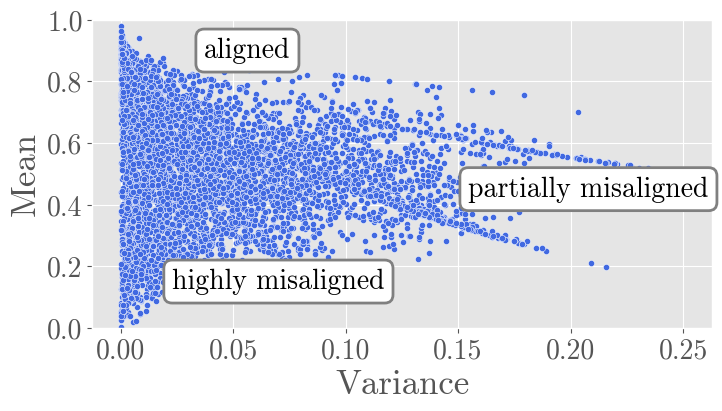

In [ ]:
def scatter_it(dataframe, hue_metric='correct.', title='', model='Cosine', show_hist=False):
    # Subsample data to plot, so the plot is not too busy.
    dataframe = dataframe.sample(n=25000 if dataframe.shape[0] > 25000 else len(dataframe))
    
    # Normalize correctness to a value between 0 and 1.
    dataframe = dataframe.assign(corr_frac = lambda d: d.correlation / d.correlation.max())
    dataframe['correct.'] = [f"{x:.1f}" for x in dataframe['correlation']]
    
    main_metric = 'score_variance'
    other_metric = 'score_avg'
    
    hue = hue_metric
    num_hues = len(dataframe[hue].unique().tolist())
    style = hue_metric

    if not show_hist:
        fig, axs = plt.subplots(1, 1, figsize=(8, 4))
        ax0 = axs
        ax0.set_ylim(0.0, 1.0)  # Set y-axis limits to [0, 1]
        ax0.grid(True)
    else:
        fig = plt.figure(figsize=(16, 10), )
        gs = fig.add_gridspec(1, 2, width_ratios=[4, 1])  
        ax0 = fig.add_subplot(gs[0, 0]) 
        ax0.set_ylim(0.0, 1.0)  # Set y-axis limits to [0, 1]
        ax0.grid(True)
    
    plot = sns.scatterplot(
        x=main_metric,
        y=other_metric,
        ax=ax0,
        data=dataframe,
        s=20,
        color="royalblue"  # 점 색을 파란색으로 지정
    )

    plot.set_xlabel('Variance', fontsize=25)
    plot.set_ylabel('Mean', fontsize=25)

    ax0.tick_params(axis='both', labelsize=20)

    #Annotate Regions.
    bb = lambda c: dict(boxstyle="round,pad=0.3", ec=c, lw=2, fc="white")
    an1 = ax0.annotate("partially misaligned", xy=(0.8, 0.45), xycoords="axes fraction", fontsize=20, color='black',
                va="center", ha="center", bbox=bb('grey'))
    an2 = ax0.annotate("aligned", xy=(0.25, 0.90), xycoords="axes fraction", fontsize=20, color='black',
                va="center", ha="center", bbox=bb('grey'))
    an3 = ax0.annotate("highly misaligned", xy=(0.30, 0.15), xycoords="axes fraction", fontsize=20, color='black',
                va="center", ha="center", bbox=bb('grey'))


    
    # Annotate Regions.
    # bb = lambda c: dict(boxstyle="round,pad=0.3", ec=c, lw=2, fc="white")
    # an1 = ax0.annotate("ambiguous", xy=(0.9, 0.5), xycoords="axes fraction", fontsize=15, color='black',
    #              va="center", ha="center", rotation=350, bbox=bb('black'))
    # an2 = ax0.annotate("easy-to-learn", xy=(0.27, 0.85), xycoords="axes fraction", fontsize=15, color='black',
    #              va="center", ha="center", bbox=bb('r'))
    # an3 = ax0.annotate("hard-to-learn", xy=(0.35, 0.25), xycoords="axes fraction", fontsize=15, color='black',
    #              va="center", ha="center", bbox=bb('b'))
  
    if show_hist:
        plot.set_title(f"{model}-{title} Data Map", fontsize=17)
        
        # Make the histograms.
        right_gs = gs[0, 1].subgridspec(3, 1, height_ratios=[1, 1, 1])  
        ax1 = fig.add_subplot(right_gs[0, 0])
        ax2 = fig.add_subplot(right_gs[1, 0])  
        ax3 = fig.add_subplot(right_gs[2, 0]) 

        plott0 = dataframe.hist(column=['score_avg'], ax=ax1, color='#622a87')
        plott0[0].set_title('')
        plott0[0].set_xlabel('confidence')
        plott0[0].set_ylabel('density')

        plott1 = dataframe.hist(column=['score_variance'], ax=ax2, color='teal')
        plott1[0].set_title('')
        plott1[0].set_xlabel('variability')
        sorted_order = sorted(dataframe['correct.'].unique(), key=lambda x: float(x))


        plot2 = sns.countplot(x="correct.", data=dataframe, color='#86bf91', ax=ax3, order=sorted_order)
        ax3.xaxis.grid(True) # Show the vertical gridlines

        plot2.set_title('')
        plot2.set_xlabel('correctness')
        plot2.set_ylabel('')

    # fig.tight_layout()
    # filename = f'figures/{title}_{model}.pdf' if show_hist else f'figures/compact_{title}_{model}.pdf'
    fig.savefig("scatter_plot_2.png", dpi=300, bbox_inches='tight', facecolor='w')
    fig.savefig("scatter_plot_2.pdf", dpi=300, bbox_inches='tight', facecolor='w')
    # fig.savefig(filename, dpi=300)

scatter_it(filtered_df, title='Proxy-Response', show_hist=False)
